In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [2]:
## Adding a button to hide the Python source code
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the Python code."></form>''')

In [3]:
HTML('''<script>
queue_show=true;
function queue_toggle() {
 if (queue_show){
 $('div.queue').hide();
 } else {
 $('div.queue').show();
 }
queue_show = !queue_show
} 
$( document ).ready(queue_toggle);
</script>
<form action="javascript:queue_toggle()"><input type="submit" value="Click here to toggle on/off the queues."></form>''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10791: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.renebreton.org">Prof. Rene Breton</a> - Twitter <a href="https://twitter.com/BretonRene">@BretonRene</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Dr. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

<div class="queue">
    Lecture 9 - 00:00
</div>

<img src="images/frequentists_vs_bayesians_2x.png" width="40%">

_[Source: XKCD](https://www.xkcd.com/1132/)_

[Read the explanation on Explain XKCD](https://www.explainxkcd.com/wiki/index.php/1132:_Frequentists_vs._Bayesians)

This carton relates to the [base rate fallacy](https://en.wikipedia.org/wiki/Base_rate_fallacy).

Need more information about Bayes inference? How about reading [A Narwhal's Guide to Bayes' Rule](https://www.embedded.fm/blog/2016/9/1/a-narwhals-guide-to-bayes-rule)? This is a funny way to learn Bayes' rule.

<div class="queue">
    Lecture 9 - 00:05
</div>

## 5.1 Bayesian inference (part 2)

### 5.1.1 Combining results

'The joint probability of two independent events is equal to the product of their probabilities'.

If we have $P(a \mid D_1)$ from a first experiment and $P(a \mid D_2)$ from a second experiment, their joint probability will be:
\begin{equation}
  P(a \mid D_1 \cap D_2) = P(a \mid D_1) \, P(a \mid D_2) \,.
\end{equation}

Two ways of calculating the joint probabilities:

1. Calculated directly if we know their analytical representation.
2. Calculated numerically using a point to point multiplication of the probabilities.

<div class="example">Example 1: Combining the posterior probabilities 'analytically'</div>

One of the 'holy grails' of cosmology is to detect the so-called B-mode polarisation in the cosmic microwave background. It turns out that their amplitude is related to the production of gravitational waves during the early Universe inflation in what is called the tensor-to-scalar ratio, $r$.

<img src="images/CMB_polarisation.png" width="60%">

_[Source: [WMAP](https://map.gsfc.nasa.gov)]_

Several experiments have attempted to measure this effect without success. Nevertheless these non-detections can prove to be important for our understanding of physics, especially if it is theoretically possible for the value of $r$ to be zero.

Imagine that a first experiment obtains a constraint on $r$ which follows a decreasing exponential: $P(r \mid \tau_1) = \frac{1}{\tau_1} e^{-\frac{r}{\tau_1}}$. From this we could evaluate an upper limit on $r$ corresponding to a certain confidence level (we will investigate this topic in future lectures).

Imagine that a second, independent experiement obtains a constraint on $r$ which also follows a decreasing exponential: $P(r \mid \tau_2) = \frac{1}{\tau_2} e^{-\frac{r}{\tau_2}}$.

What would be the joint constraint based on the two experiments? We can multiply the probabilities, and renormalise:
\begin{eqnarray}
  P(r \mid \tau_1, \tau_2) &=& P(r \mid \tau_1) \, P(r \mid \tau_2) \\
    &=& \left(\frac{1}{\tau_1} + \frac{1}{\tau_2}\right) \exp \left[-\left(\frac{1}{\tau_1} + \frac{1}{\tau_2}\right) r\right] \,.
\end{eqnarray}

It is therefore clear that combining different experiments could improve the limits on $r$.

_Note, however, that real-life situation is more complicated: distribution might not be exponential and systematic uncertainties might prevent upper limits from improving beyond a certain point._

<div class="example">Example 2: Combining the posterior probabilities 'numerically'</div>

Below is the archetypical illustration of joint probability. This illustrates the joint constrainst from various cosmological experiments for the so-called lambda cold dark matter (aka lambda-CDM) model parameters. The joint constraint is showed near the centre. Clearly, this can only be calculated numerically using a point-to-point multiplication.

<img src="images/cosmo_summary_allen11.png" width="50%">

_[Source: Allen et al., 'Measuring cosmic distances with galaxy clusters', [arXiv:1307.8152](https://arxiv.org/abs/1307.8152)]_

<div class="queue">
    Lecture 9 - 00:20
</div>

### 5.1.2 On the use of priors

**Combining results by multiplying probabilities and using priors are completely interchangeable in the mathematical sense.**

Due to priors and posteriors being independent of the data.

#### Flat priors

Flat priors are constant (i.e. $I(a) = C$). Normalisation:

\begin{equation}
  \int_{a_{\rm min}}^{a_{\rm max}} C\, {\rm d}a = 1 \,,
\end{equation}


implies that $I = \frac{1}{a_{\rm max}-a_{\rm min}}$. Generalisation where $a$ is multi-dimensional is $I = \frac{1}{V_a}$, where $V_a$ is the hyper volume of parameter space occupied by $a$.

#### Improper priors

There situations where the priors cannot be normalised to a finite value. This is the case for flat priors with unconstrained range (e.g. $(-\infty,+\infty)$ or $[0,+\infty)$). We call them _improper priors_.

Once again, because of the independence of the prior with respect to the parameter to optimise, it does not matter to calculate the MAP. Furthermore, the posterior probability can still be normalised as long as the likelihood itself can be normalised. An example would be if the improper prior is a constant line. If the likelihood is a Gaussian, then their product is a Gaussian and can be normalised.

<img src="images/bayesevol.png" width="60%">

<div class="queue">
    Lecture 9 - 00:30
</div>

<div class="example">Example 1: MAP of a simple lifetime</div>

Let us recall the radioactive decay example from the previous chapter with the likelihood given by

\begin{equation}
  \mathcal{L}(t_i \mid \tau) = \frac{1}{\tau} e^{-t_i/\tau} \,.
\end{equation}

What if there is a non-constant prior $I \propto \tau^{-1}$? We can no longer use MLE and need to use MAP instead. Hence

\begin{eqnarray}
  P(\tau \mid t_i) &\propto& I(\tau) \mathcal{L}(t_i \mid \tau) \\
  &=& \frac{1}{\tau} \prod_i^N \frac{1}{\tau} e^{-t_i/\tau} \,.
\end{eqnarray}

The MAP estimator $\widehat{\tau}$ is obtained by differenciating the logarithm of the posterior:

\begin{eqnarray}
  \frac{\partial \ln P}{\partial \tau} &=& \frac{\partial}{\partial \tau} \left[ -\ln \tau - \sum_i^N \left( \ln \tau +\frac{t_i}{\tau} \right) \right] \\
                                   &=& \frac{1}{\tau} - \sum_i^N \left( \frac{1}{\tau} - \frac{t_i}{\tau^2} \right) \,.
\end{eqnarray}

Setting the above equation to zero and solving for $\tau$ allows us to obtain the MAP of $\widehat{\tau}$:

\begin{equation}
  \widehat{\tau} = \frac{1}{N-1} \sum t_i \,.
\end{equation}

<div class="queue">
    Lecture 10 - 00:00
</div>

## 5.2 Least square

### 5.2.1 Least square derivation

Particular case: Gaussian likelihood distribution.

Consider $(x_i,y_i)$ the independant and dependant variables. Let $\sigma_i$ be the Gaussian deviation of $y_i$ with respect to the true value which can be mapped from $x$ using a function, $f(x;\theta)$, that depends on some unknown parameters, $\theta$.

\begin{equation}
  \mathcal{L}(y_i \mid f(\theta), \theta, x_i, \sigma_i) = \frac{1}{\sqrt{2\pi} \sigma_i} \exp{\left(-\frac{\left( y_i - f(x_i;\theta) \right)^2}{2\sigma_i^2}\right)}
\end{equation}

Assuming flat priors:

\begin{eqnarray}
  P(\theta \mid f(\theta), y, x, \sigma) &=& \frac{I \mathcal{L}(y \mid \theta)}{E} \\
    &=& \frac{I}{E} \prod_i^N \frac{1}{\sqrt{2\pi} \sigma_i} \exp{\left(-\frac{\left( y_i - f(x_i;\theta) \right)^2}{2\sigma_i^2}\right)} \,.
\end{eqnarray}

Taking the logarithm:

\begin{equation}
  \ln P(\theta \mid f, y, x, \sigma) = \ln I - \frac{N}{2} \ln{(2\pi)} - \sum_i^N \ln \sigma_i - \frac{1}{2} \sum_i^N \frac{\left( y_i - f(x_i;\theta) \right)^2}{\sigma_i^2} - \ln E \,.
\end{equation}

Both $I$ and $E$ are independant of $\theta$, hence MAP $\equiv$ MLE.

\begin{equation}
  \max \left[ \ln P(\theta \mid f, x_i, \sigma_i) \right] = \max \left[ -\frac{1}{2} \sum_i^N \frac{\left( y_i - f(x_i;\theta) \right)^2}{\sigma_i^2} \right] = \min \left[ \sum_i^N \frac{\left( y_i - f(x_i;\theta) \right)^2}{\sigma_i^2} \right] \,.
\end{equation}

We call it **chi-squared**, and the **method of least squares**.

For the chi-squared, the minimum variance bound can be written:

\begin{eqnarray}
  \sigma^2_\widehat{\theta} &\equiv& \left[ \left( -\frac{\partial^2 \ln \mathcal{L}}{\partial \theta^2} \right)^{-1} \right]_\widehat{\theta} \\
  &=& \left[ \left( \frac{1}{2} \frac{\partial^2 \chi^2}{\partial \theta^2} \right)^{-1} \right]_\widehat{\theta} \,.
\end{eqnarray}


<div class="queue">
    Lecture 10 - 00:20
</div>

### 5.2.2 Linear least squares

A particularly interesting are models which are linear functions of the $M$ parameters $\theta_j$:

\begin{equation}
  f(x_i; \theta) = \sum_j^M A_j(x_i) \theta_j \,,
\end{equation}

<div class="example">Example 1: $f(x; \theta) = mx$ with constant uncertainties</div>

Consider $f(x) = m x$, with constant errors $\sigma$.

\begin{equation}
  \chi^2 = \sum_i^N \frac{(y_i - m x_i)^2}{\sigma^2}
\end{equation}

Differentiating with respect to $m$

\begin{equation}
  \frac{\partial \chi^2}{\partial m} = \sum_i^N \left[ -2 x_i \frac{(y_i - m x_i)}{\sigma^2} \right]
\end{equation}

MLE estimator obtained by setting equal to 0:

\begin{eqnarray}
  \sum_i^N (x_i y_i - \widehat{m} x_i^2) = 0 \\
  \sum_i^N x_i y_i = \widehat{m} \sum_i^N x_i^2 \,.
\end{eqnarray}

Solving for $\widehat{m}$:

\begin{equation}
  \widehat{m} = \frac{\langle xy \rangle}{\langle x^2 \rangle}
\end{equation}

The variance is found from the inverse of Fisher:

\begin{eqnarray}
  \sigma^2_{\widehat{m}} &=& \left( \frac{1}{2} \frac{\partial^2 \chi^2}{\partial m^2} \right)^{-1} \\
  &=& \left( \frac{\sum_i^N x_i^2}{\sigma^2} \right)^{-1} \\
  &=& \frac{\sigma^2}{N \langle x^2 \rangle} \,.
\end{eqnarray}

<div class="example">Example 2: $f(x; \theta) = mx + b$ with constant uncertainties</div>

Consider $f(x) = m x + b$ with constant errors $\sigma$.

\begin{equation}
  \chi^2 = \sum_i^N \frac{(y_i - m x_i - b)^2}{\sigma^2}
\end{equation}

Differentiating with respect to $m$

\begin{equation}
  \frac{\partial \chi^2}{\partial m} = \sum_i^N \left[ -2 x_i \frac{(y_i - m x_i - b)}{\sigma^2} \right] \,.
\end{equation}

Differentiating with respect to $b$

\begin{equation}
  \frac{\partial \chi^2}{\partial b} = \sum_i^N \left[ -2 \frac{(y_i - m x_i - b)}{\sigma^2} \right]
\end{equation}

MLE estimator obtained by setting equal to 0:

\begin{eqnarray}
  \langle xy \rangle - \widehat{m}\langle x^2 \rangle - \widehat{b}\langle x \rangle = 0 \\
  \langle y \rangle - \widehat{m}\langle x \rangle - \widehat{b} = 0 \,.
\end{eqnarray}

Solving for $\widehat{m}$ and $\widehat{b}$:

\begin{eqnarray}
  \widehat{m} &=& \frac{\langle xy \rangle - \langle x \rangle \langle y \rangle}{\langle x^2 \rangle - \langle x \rangle^2} = \frac{\operatorname{cov}(x,y)}{\operatorname{Var}(x)} \\
  \widehat{b} &=& \frac{\langle x^2 \rangle \langle y \rangle - \langle x \rangle \langle xy \rangle}{\langle x^2 \rangle - \langle x \rangle^2} = \langle y \rangle - \widehat{m}\langle x \rangle \,.
\end{eqnarray}

We can also find the variance on the estimators, which is the Fisher information matrix. For $\widehat{m}$ we have:

\begin{equation}
  \sigma^2_{\widehat{m}} = \frac{\sigma^2}{N (\langle x^2 \rangle - \langle x \rangle^2)} \,.
\end{equation}

For $\widehat{b}$ we have:

\begin{equation}
  \sigma^2_{\widehat{b}} = \frac{\sigma^2 \langle x^2 \rangle}{N (\langle x^2 \rangle - \langle x \rangle^2)}
\end{equation}

And for the covariance of $\widehat{m}$ and $\widehat{b}$ (i.e. the off-diagonal term):

\begin{equation}
  \operatorname{cov}(\widehat{m},\widehat{b}) = -\frac{\langle x \rangle}{N (\langle x^2 \rangle - \langle x \rangle^2)} \sigma^2 \,.
\end{equation}

The equation for $\widehat{b}$ implies that the best fit goes through the centre of gravity $(\langle x \rangle,\langle y \rangle)$. Therefore, choosen the origin (i.e. intersect) near $\langle x \rangle$ will yield a smaller covariance between $\widehat{m}$ and $\widehat{b}$ and reduce numerical errors.

<div class="queue">
    Lecture 10 - 00:35
</div>

### 5.2.3 Chi-square distribution

Just defined the chi-squared distribution. It is the probability distribution of the sum of the squares of $k$ independent standard normal random variables (i.e. having $\mu = 0$ and $\sigma = 1$). The PDF is given by:

\begin{equation}
  \chi^2_k \equiv f(x;\,k) =
  \begin{cases}
    \dfrac{x^{\frac k 2 -1} e^{-\frac x 2}}{2^{\frac k 2} \Gamma\left(\frac k 2 \right)},  & x > 0; \\ 0, & \text{otherwise}.
  \end{cases}
\end{equation}

$k$ degrees of freedom ($k = N - M$), where $N$ data points and $M$ parameters.

The mean of a $\chi^2_k$ is $k$ and its variance is $2k$.

CLT implies: large $k$ ($\approx 30$), chi-squared becomes roughly Gaussian.

Also: $\chi^2_{k_1}$ + $\chi^2_{k_2}$ is $\chi^2_{k_1+k_2}$.

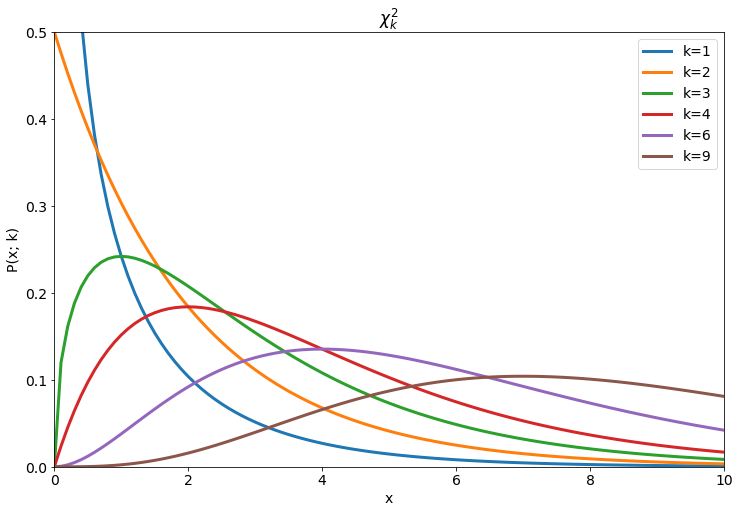

In [4]:
## Displaying the chi2 distribution for different numbers of freedom
x = np.linspace(0,10,101)
dof = [1,2,3,4,6,9]

fig, ax = plt.subplots(figsize=(12,8))
for dof_ in dof:
    chi2 = scipy.stats.chi2.pdf(x, dof_)
    ax.plot(x, chi2, linewidth=3, label='k={}'.format(dof_))

ax.legend()
ax.set_title('$\chi^2_k$')
ax.set_xlabel('x')
ax.set_ylabel('P(x; k)')
ax.set_xlim(0, 10)
ax.set_ylim(0, 0.5);

<div class="queue">
    Lecture 10 - 00:40
</div>

### 5.2.4 Non-linear least squares

When $f(x; \theta)$ is a non-linear function of $\theta$ (e.g. $e^{\theta x}$, $\sin{(\theta x)}$), generally no analytic solution to solve the $M$ equations for each of the parameters in $\theta$. The MLE must be computed numerically.

Techniques to do so are beyond the scope of this course, but can involve gradient methods, simplex search, Monte Carlo, etc.

### 5.2.5 Best linear unbiased estimator

The principles behind combining data have already been discussed previously. How about combining measurements with least square?

Consider $N$ independent measurements $\{y_i\}$ with Gaussian errors $\{\sigma_i\}$ of a quantity $\theta$. In order to get the best average of all measurements we can minimize the $\chi^2$:
\begin{equation}
  \chi^2 = \sum_i^N \left( \frac{y_i - \theta}{\sigma_i} \right)^2 \,.
\end{equation}

Taking the derivative:
\begin{equation}
  \frac{\partial \chi^2}{\partial \theta} = -2 \sum_i^N \frac{y_i - \theta}{\sigma_i^2} \,.
\end{equation}

Setting it to zero, we find the MLE:
\begin{equation}
  \widehat{\theta} = \frac{\sum_i^N \frac{y_i}{\sigma_i^2}}{\sum_i^n \frac{1}{\sigma_i^2}} \,.
\end{equation}

And the variance after taking the second derivative:
\begin{equation}
  \sigma^2_{\widehat{\theta}} = \frac{1}{\sum_i^N \frac{1}{\sigma_i^2}} \,.
\end{equation}

We note that the smaller the error on a measurement, the larger its importance on the average value.

### 5.2.6 Other topics

We will not see them in this course, but other topics of interest are:

- Least squares with boundary conditions (using Lagrange multipliers)
- Least squares of binned data

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>